In [1]:
import pandas as pd
from sklearn.metrics import r2_score
%matplotlib inline

## Final submission (sub 15)


--------------------------------------------------
Processing training and test data together...
--------------------------------------------------
x_train.shape = (1460, 329)
x_test.shape = (1459, 329)

--------------------------------------------------
Comparing CV Scores...
--------------------------------------------------
Average score for Lasso = 0.904
[ 0.92974815  0.90363333  0.90158194  0.91881374  0.8637646 ]

Average score for Ridge = 0.899
[ 0.9224864   0.8970171   0.90482461  0.91332239  0.85512494]

Average score for GradientBoostingRegressor = 0.909
[ 0.91989044  0.8998408   0.906197    0.91532575  0.90167249]


--------------------------------------------------
Running XGBOOST...
--------------------------------------------------
XGBOOST mean CV score: 0.872

--------------------------------------------------
Building & fitting a stacked model...
--------------------------------------------------
Mean CV score for the stacked model: 0.915

-----------------------------

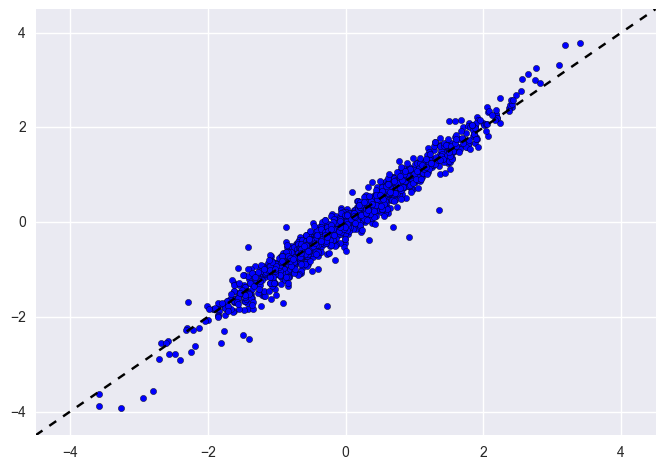

In [2]:
import finalsub
x_train, x_test, y_train, all_data = finalsub.process_data()
regressors = finalsub.compare_CV(x_train, y_train)
finalsub.run_xgboost(x_train, y_train)
reg2stack = [regressors[x] for x in ['Lasso', 'GradientBoostingRegressor']]
y_pred = finalsub.fit_stack(x_train, y_train, x_test, regressors=reg2stack)
saleprice15 = finalsub.write_submission(y_pred)

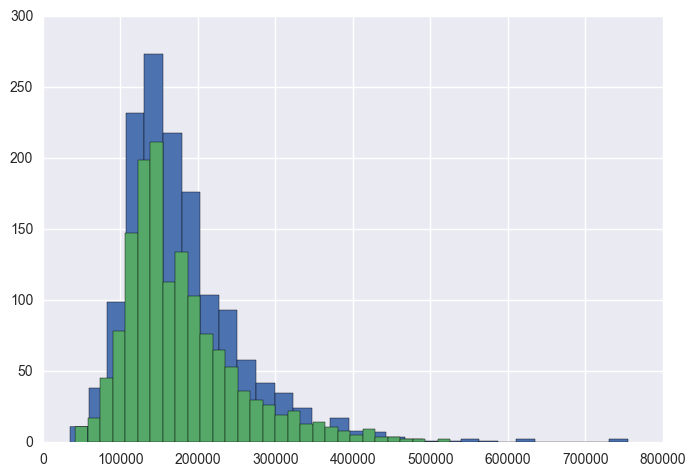

In [3]:
# Compare the SalePrice distributions between training data and predicted values
train = pd.read_csv('train.csv')
h = plt.hist(train['SalePrice'], bins=30, label='train')
h = plt.hist(saleprice15, bins=30, label='test')